In [1]:
import time
import sympy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Brute Force Factorization of n to find 'p' and 'q'
def brute_force_factorization(n):
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return i, n // i
            return None, None

In [3]:
# Computing the modular inverse of e modulo phi
def compute_d(e, phi):
    return pow(e, -1, phi)

In [4]:
#Measuring the time taken to factor pq and compute d
def measure_rsa_decryption_time(p, q, e):
    n = p * q
    phi = (p - 1) * (q - 1)

    start_factor = time.time()
    p_factored, q_factored = brute_force_factorization(n)
    end_factor = time.time()

    if p_factored is None or q_factored is None:
        raise ValueError("Factorization failed")

    start_d = time.time()
    d = compute_d(e, phi)
    end_d = time.time()

    return end_factor - start_factor, end_d - start_d  

In [5]:
# Compute decryption key d for given p, q, and e
p_given, q_given, e_given = 43, 59, 13
n_given = p_given * q_given
phi_given = (p_given - 1) * (q_given - 1)

start_d_given = time.time()
d_given = compute_d(e_given, phi_given)
end_d_given = time.time()

time_taken_given = end_d_given - start_d_given
print(f"Given p={p_given}, q={q_given}, e={e_given}")
print(f"Computed d = {d_given}")
print(f"Time taken to compute d: {time_taken_given:.6f} sec\n")

Given p=43, q=59, e=13
Computed d = 937
Time taken to compute d: 0.000000 sec



In [14]:
# Selecting Prime Numbers
prime_sizes = [4, 6, 8, 10]
factor_times = []
d_times = []
n_values = []
e = sympy.prime(100)

for size in prime_sizes:
    p = sympy.randprime(10**(size-1), 10**size)
    q = sympy.randprime(10**(size-1), 10**size)
    n = p * q
    factor_time, d_time = measure_rsa_decryption_time(p, q, e)
    factor_times.append(factor_time)
    d_times.append(d_time)
    n_values.append(n)

In [20]:
print("\nFinal Results:")
for i, size in enumerate(prime_sizes):
    print(f"Prime size: {size} digits - Factorization Time: {factor_times[i]:.6f} sec, d Computation Time: {d_times[i]:.6f} sec")


Final Results:
Prime size: 4 digits - Factorization Time: 0.000991 sec, d Computation Time: 0.001031 sec
Prime size: 6 digits - Factorization Time: 0.102535 sec, d Computation Time: 0.000000 sec
Prime size: 8 digits - Factorization Time: 13.923104 sec, d Computation Time: 0.000000 sec
Prime size: 10 digits - Factorization Time: 3207.578826 sec, d Computation Time: 0.002022 sec


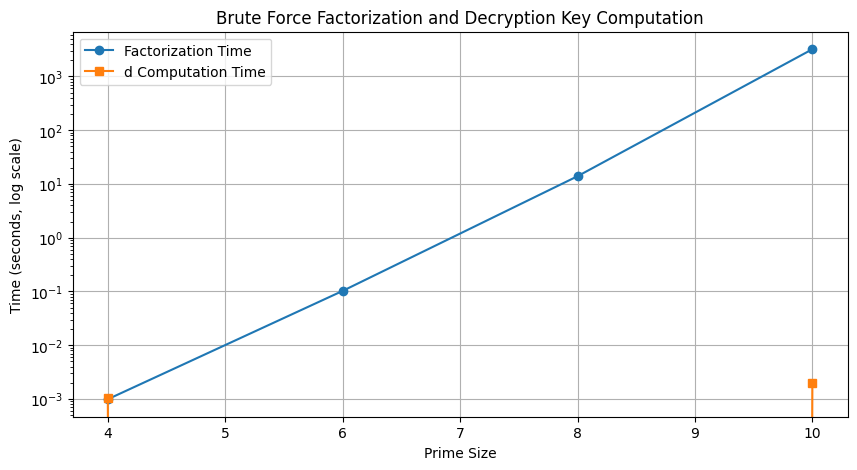

In [22]:
# Plot results
plt.figure(figsize=(10, 5))
plt.yscale('log')  # Log scale due to large differences
plt.plot(prime_sizes, factor_times, marker='o', label='Factorization Time')
plt.plot(prime_sizes, d_times, marker='s', label='d Computation Time')
plt.xlabel('Prime Size')
plt.ylabel('Time (seconds, log scale)')
plt.title('Brute Force Factorization and Decryption Key Computation')
plt.legend()
plt.grid(True)
plt.show()